# PUNTO 1

## 1.1 

### Extracci칩n de los Datos

In [1]:
import pandas as pd
import numpy as np

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv(url, header=None, delimiter=r"\s+", names=column_names)

# Muestra las primeras filas del DataFrames
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

### Partici칩n y Estandarizaci칩n de X

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('MEDV', axis=1)  
y = df['MEDV']               

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Evaluaci칩n de los Alphas

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

#### El Alpha controla la penalizaci칩n de los coeficientes del modelo, para prevenir el sobreajuste y mejorar la generalizaci칩n.

#### Para la regresi칩n Ridge, la penalizaci칩n es proporcional al cuadrado de la magnitud de los coeficientes (norma L2). 

#### En LASSO, la penalizaci칩n es proporcional a la magnitud absoluta de los coeficientes (norma L1).

#### Elastic-Net es una combinaci칩n de Ridge y LASSO. Utiliza ambas penalizaciones L1 y L2.  

#### 풭 (a menudo llamado l1_ratio en implementaciones) es otro par치metro que balancea la contribuci칩n de L1 frente a L2. 洧띺 sigue siendo el par치metro general de penalizaci칩n que controla la cantidad total de regularizaci칩n.


#### NORMALIZAR

In [5]:
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_normalized = (X - X_mean) / X_std

#### GRAFICAR  
$$
\boldsymbol{\beta} = (\mathbf{X}^\top \mathbf{X} + \alpha \mathbf{I})^{-1} \mathbf{X}^\top \mathbf{y}
$$

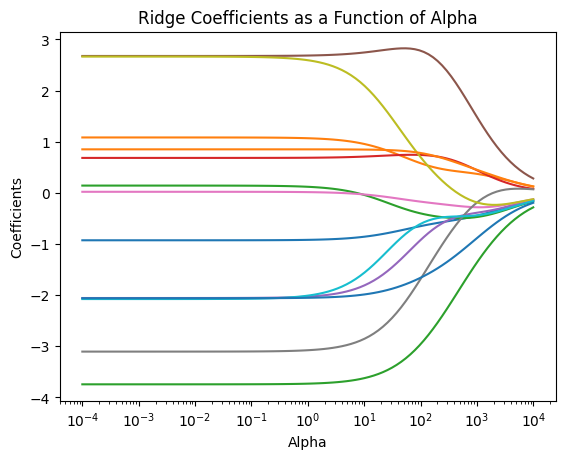

In [7]:
alphas = np.logspace(-4, 4, 100)
coefficients_ridge = []

for alpha in alphas:
    identity_matrix = np.eye(X_normalized.shape[1])
    ridge_coeff = np.linalg.inv(X_normalized.T @ X_normalized + alpha * identity_matrix) @ X_normalized.T @ y
    coefficients_ridge.append(ridge_coeff)

# Visualizaci칩n de los coeficientes de Ridge
import matplotlib.pyplot as plt
plt.plot(alphas, coefficients_ridge)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Ridge Coefficients as a Function of Alpha')
plt.show()

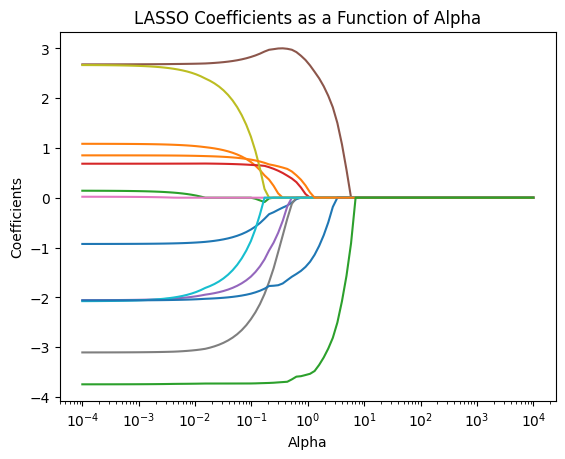

In [8]:
# Importaremos la clase Lasso de scikit-learn solo para la facilidad de c치lculo
from sklearn.linear_model import Lasso

coefficients_lasso = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, fit_intercept=False)
    lasso.fit(X_normalized, y)
    coefficients_lasso.append(lasso.coef_)

# Visualizaci칩n de los coeficientes de LASSO
plt.plot(alphas, coefficients_lasso)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('LASSO Coefficients as a Function of Alpha')
plt.show()

### CRECI칍N DE LOS MODELOS

#### GridSearchCV es una herramienta que ayuda a automatizar el proceso de ajuste de par치metros para encontrar el mejor modelo posible.

#### Buscar exhaustivamente: Prueba todas las combinaciones posibles de los par치metros que se especifican.GridSearchCV entrenar치 un modelo para cada valor utilizando la t칠cnica de validaci칩n cruzada.

#### Validaci칩n Cruzada: Para cada conjunto de par치metros, utiliza el m칠todo de validaci칩n cruzada (se especifica en el par치metro cv) para evaluar el rendimiento del modelo. 

#### Selecci칩n del Mejor Modelo: Una vez que todos los modelos han sido evaluados, selecciona el modelo que tuvo el mejor rendimiento de acuerdo con la m칠trica de rendimiento que se haya especificado (ejm: precisi칩n, AUC ROC, RMSE, etc.).

#### RIDGE

In [12]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
parameters = {'alpha': np.logspace(-4, 4, 100)}
ridge_cv = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_cv.fit(X_train_scaled, y_train)

print("Mejor valor de alpha para Ridge:", ridge_cv.best_params_)
print("Mejor score para Ridge:", ridge_cv.best_score_)

Mejor valor de alpha para Ridge: {'alpha': 2.310129700083163}
Mejor score para Ridge: -23.64607294897078


In [22]:
np.log10(2.310129700083163)

0.3636363636363642

##### Eso significa que GridSearchCV eligi칩 a $$ 10^{0.363}$$

#### LASSO

In [23]:
lasso = Lasso()
lasso_cv = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_cv.fit(X_train_scaled, y_train)

print("Mejor valor de alpha para LASSO:", lasso_cv.best_params_)
print("Mejor score para LASSO:", lasso_cv.best_score_)

Mejor valor de alpha para LASSO: {'alpha': 0.0001}
Mejor score para LASSO: -23.654589851597517


In [29]:
np.log10(0.0001)

-4.0

##### Eso significa que GridSearchCV eligi칩 a $$ 10^{-4}$$ 
##### El valor m치s extremo, por lo cu치l podr칤amos intentar analizar ampliando el rango de b칰squeda de alpha

In [32]:
lasso = Lasso()
parameters = {'alpha': np.logspace(-6, 6, 200)}
lasso_cv = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_cv.fit(X_train_scaled, y_train)

print("Mejor valor de alpha para LASSO:", lasso_cv.best_params_)
print("Mejor score para LASSO:", lasso_cv.best_score_)

Mejor valor de alpha para LASSO: {'alpha': 1e-06}
Mejor score para LASSO: -23.654419976103718


In [33]:
np.log10(1e-06)

-6.0

##### Nuevamente eligi칩 el valor m치s extremo, por lo que puede estar indicando que El modelo est치 posiblemente sufriendo de subajuste cuando 洧띺 es m치s alto, es decir, la introducci칩n de la regularizaci칩n est치 degradando la capacidad del modelo para capturar la relaci칩n subyacente en los datos.

#### ELASTIC NET

In [24]:
elastic_net = ElasticNet()
parameters_en = {'alpha': np.logspace(-4, 4, 100), 'l1_ratio': np.linspace(0.01, 1, 25)}
elastic_net_cv = GridSearchCV(elastic_net, parameters_en, scoring='neg_mean_squared_error', cv=5)
elastic_net_cv.fit(X_train_scaled, y_train)

print("Mejores par치metros para Elastic-Net:", elastic_net_cv.best_params_)
print("Mejor score para Elastic-Net:", elastic_net_cv.best_score_)

Mejores par치metros para Elastic-Net: {'alpha': 0.007220809018385471, 'l1_ratio': 0.01}
Mejor score para Elastic-Net: -23.64626672260496


In [30]:
np.log10(0.007220809018385471)

-2.141414141414141

##### Eso significa que GridSearchCV eligi칩 a $$ 10^{-2.14}$$ 

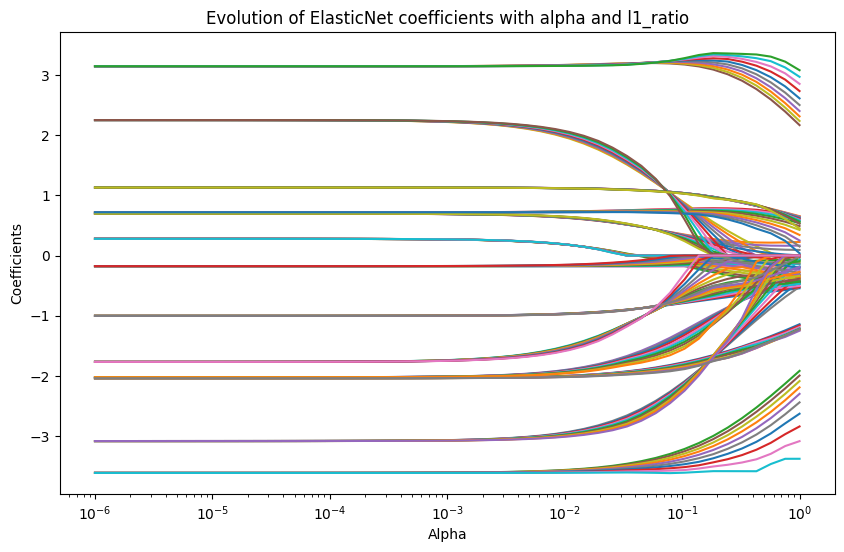

In [40]:
# Asumimos que 'alphas' y 'l1_ratios' se extraen de GridSearchCV
alphas = np.logspace(-6, 0, 50)  # Ejemplo: Ajusta seg칰n tus rangos explorados
l1_ratios = np.linspace(0.01, 1.0, 10)  # Ejemplo: Ajusta seg칰n tus rangos explorados

# Crear un gr치fico
plt.figure(figsize=(10, 6))

# Reentrenar y recoger coeficientes
for l1_ratio in l1_ratios:
    coefs = []
    for alpha in alphas:
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        model.fit(X_train_scaled, y_train)
        coefs.append(model.coef_)
    
    coefs = np.array(coefs)
    
    # Graficar la evoluci칩n de los coeficientes para este l1_ratio
    for i in range(coefs.shape[1]):  # Asumiendo que tienes m치s de un coeficiente
        plt.plot(alphas, coefs[:, i], label=f'Feature {i+1} at l1_ratio={l1_ratio}')
    
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Evolution of ElasticNet coefficients with alpha and l1_ratio')
plt.show()

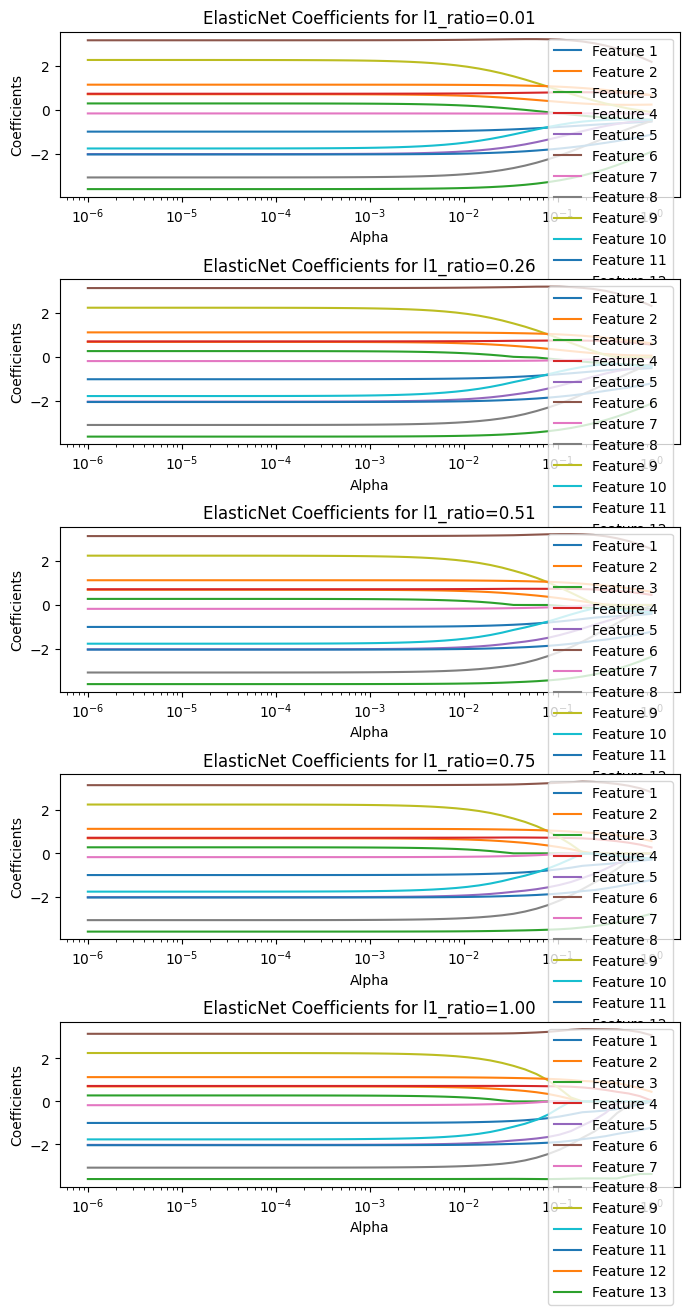

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet

# Definir los valores de alpha y l1_ratio
alphas = np.logspace(-6, 0, 50)  # Ajusta esto seg칰n tu rango explorado
l1_ratios = np.linspace(0.01, 1.0, 5)  # 5 diferentes l1_ratios para demostraci칩n

# Crear subplots
fig, axes = plt.subplots(nrows=len(l1_ratios), ncols=1, figsize=(8, 15))
fig.subplots_adjust(hspace=0.5)  # Ajustar el espacio entre gr치ficos

# Reentrenar y recoger coeficientes para cada l1_ratio
for idx, l1_ratio in enumerate(l1_ratios):
    coefs = []
    for alpha in alphas:
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        model.fit(X_train_scaled, y_train)
        coefs.append(model.coef_)
    
    coefs = np.array(coefs)
    
    # Graficar la evoluci칩n de los coeficientes para este l1_ratio en su subplot
    for i in range(coefs.shape[1]):  # Asumiendo que tienes m치s de un coeficiente
        axes[idx].plot(alphas, coefs[:, i], label=f'Feature {i+1}')
    
    axes[idx].set_xscale('log')
    axes[idx].set_xlabel('Alpha')
    axes[idx].set_ylabel('Coefficients')
    axes[idx].set_title(f'ElasticNet Coefficients for l1_ratio={l1_ratio:.2f}')
    axes[idx].legend()

plt.show()

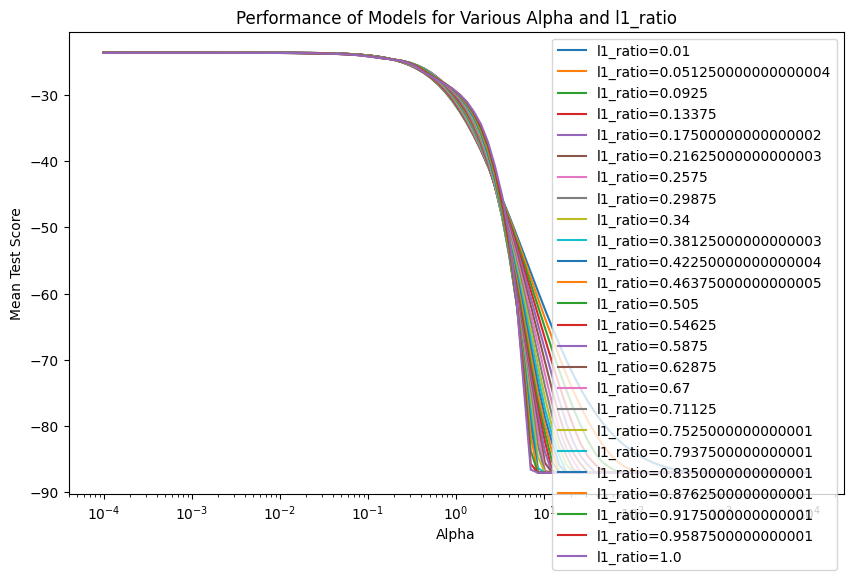

In [31]:
# Convertir los resultados a un DataFrame
results = pd.DataFrame(elastic_net_cv.cv_results_)

# Visualizaci칩n
plt.figure(figsize=(10, 6))
for l1_ratio in results['param_l1_ratio'].unique():
    subset = results[results['param_l1_ratio'] == l1_ratio]
    plt.plot(subset['param_alpha'], subset['mean_test_score'], label=f'l1_ratio={l1_ratio}')

plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Test Score')
plt.title('Performance of Models for Various Alpha and l1_ratio')
plt.legend()
plt.show()

#### La ca칤da pronunciada en el rendimiento a medida que 洧띺 aumenta podr칤a indicar que el modelo comienza a sufrir de subajuste. A valores muy altos de 洧띺, la penalizaci칩n se hace tan dominante que los coeficientes del modelo se reducen significativamente, posiblemente hacia cero. Esto lleva a que el modelo pierda la capacidad de capturar la variabilidad de los datos y, por lo tanto, su rendimiento decrece notablemente

#### Todos los scores est치n en formato negativo porque GridSearchCV utiliza "negative mean squared error" (error cuadr치tico medio negativo) como la m칠trica para la evaluaci칩n. Esto significa que valores m치s cercanos a cero son mejores, ya que representan un error m치s bajo.

#### El hecho de que LASSO y Elastic-Net tengan configuraciones 칩ptimas con un 洧띺 muy bajo sugiere que podr칤an no estar aprovechando al m치ximo su capacidad de regularizaci칩n. Espec칤ficamente para Elastic-Net, un l1_ratio tan bajo indica que la penalizaci칩n est치 siendo aplicada casi en su totalidad como regularizaci칩n L2 (Ridge), con solo una peque침a parte de la penalizaci칩n L1 (LASSO).

### REVISI칍N DE LOS COEFICIENTES

In [34]:
# Coeficientes de Ridge
coefficients_ridge = ridge_cv.best_estimator_.coef_

# Coeficientes de LASSO
coefficients_lasso = lasso_cv.best_estimator_.coef_

# Coeficientes de Elastic-Net
coefficients_elastic_net = elastic_net_cv.best_estimator_.coef_

print(f"Coeficientes de Ridge: {coefficients_ridge}")
print(f"Coeficientes de LASSO: {coefficients_lasso}")
print(f"Coeficientes de Elastic-Net: {coefficients_elastic_net}")

Coeficientes de Ridge: [-0.9799235   0.65515706  0.221005    0.726986   -1.9511889   3.15898799
 -0.17863612 -2.99834436  2.07887188 -1.61036187 -2.0153308   1.12411829
 -3.58282066]
Coeficientes de LASSO: [-1.00213255  0.69626365  0.27805573  0.71873855 -2.02231308  3.1452402
 -0.17604561 -3.08190058  2.25138858 -1.76699577 -2.03774966  1.12956712
 -3.61165817]
Coeficientes de Elastic-Net: [-0.9745792   0.64540755  0.20749467  0.72884808 -1.93381539  3.16200437
 -0.1790112  -2.97782412  2.03867124 -1.57434459 -2.00985394  1.12268482
 -3.57583036]


Ridge: Generalmente no reduce los coeficientes exactamente a cero. Por lo tanto, todas las variables permanecen en el modelo, pero con coeficientes posiblemente reducidos.
LASSO: Es conocido por su capacidad de realizar selecci칩n de variables al reducir los coeficientes de algunas variables exactamente a cero, lo que efectivamente las elimina del modelo.Para este caso, no lo hizo
Elastic-Net: Combina las propiedades de Ridge y LASSO. Reduce algunos coeficientes a cero (como LASSO) y reduce otros (como Ridge).

Los coeficientes m치s grandes en magnitud (positivos o negativos) sugieren una mayor influencia en la variable respuesta. Por ejemplo, el coeficiente para la sexta variable sugiere una fuerte influencia positiva en la variable respuesta en los 3 modelos.

$$
\text{Ridge Regression:} \\
y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \ldots + \beta_{13} X_{13}
$$

$$
\text{LASSO Regression:} \\
y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \ldots + \beta_{13} X_{13}
$$

$$
\text{Elastic-Net Regression:} \\
y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \ldots + \beta_{13} X_{13}
$$

### EVALUAR LOS MODELOS

In [35]:
from sklearn.metrics import mean_squared_error

y_pred_ridge = ridge_cv.predict(X_test_scaled)
y_pred_lasso = lasso_cv.predict(X_test_scaled)
y_pred_elastic_net = elastic_net_cv.predict(X_test_scaled)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
rmse_elastic_net = np.sqrt(mean_squared_error(y_test, y_pred_elastic_net))

print("RMSE Ridge:", rmse_ridge)
print("RMSE LASSO:", rmse_lasso)
print("RMSE Elastic-Net:", rmse_elastic_net)

RMSE Ridge: 4.93369651813757
RMSE LASSO: 4.928602524066675
RMSE Elastic-Net: 4.934990017029132


####  La diferencia m치s significativa est치 entre LASSO y los otros dos modelos, aunque es muy peque침a (menos de 0.01). Esto indica que, en t칠rminos de error cuadr치tico medio, la eficacia de los modelos es pr치cticamente la misma.

## 1.2